# CS 109A/AC 209A/STAT 121A Data Science: Lab 9 (Solution)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 16th, 2016 at 11:59pm

Import libraries

In [39]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1: Remote Sensing Revisited

In this problem we revisit applications of classification, with the purpose of comparing the performance of support vector classifiers with other classifiers we have learned. We'll begin with the aeriel vegetation detection problem from Homework #7.

The data is contained in `dataset_1_train.txt`, `dataset_1_test.txt` and `dataset_2_train.txt`, `dataset_2_test.txt` (you are encouraged to use the datasets from Homework #7 as well). The first two columns of the data contains the latitude and longitudes of randomly sampled locations in the satellite image, and the last column contains a label indicating whether the location contains vegetation (1 denotes the presence of vegetation and 0 denotes otherwise). The task is to, again, identify the vegetation regions in the image.

Again, we provide you with a function `plot_decision_boundary` to visualize the decision boundary of a classifier.

In [40]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

### Step 1: Load the data and explore

Let's load the two datasets and visualize.

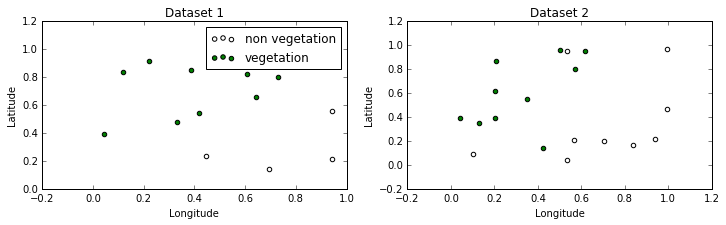

In [41]:
# Load dataset_1
data_1 = pd.read_csv('datasets/dataset_1_train.txt', delimiter=',')

# Load dataset_2
data_2 = pd.read_csv('datasets/dataset_2_train.txt', delimiter=',')

# Plot data
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

#Plot dataset 1

x = data_1.values[:, :-1]
y = data_1.values[:, -1]

ax[0].scatter(x[y==0, 0], x[y==0, 1], c='white', label='non vegetation')
ax[0].scatter(x[y==1, 0], x[y==1, 1], c='green', label='vegetation')

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Dataset 1')
ax[0].legend(loc='best')

#Plot dataset 2

x = data_2.values[:, :-1]
y = data_2.values[:, -1]

ax[1].scatter(x[y==0, 0], x[y==0, 1], c='white', label='non vegetation')
ax[1].scatter(x[y==1, 0], x[y==1, 1], c='green', label='vegetation')

ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Dataset 2')

plt.show()


It looks like the classes in dataset 1 is well separated, while the classes in dataset 2 is not.

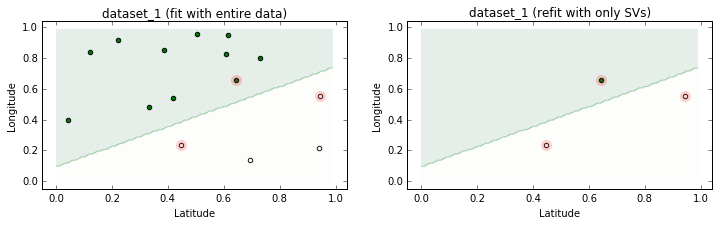

In [42]:
# Load dataset_1
x = data_1.values[:, :-1]
y = data_1.values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_1 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_1 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

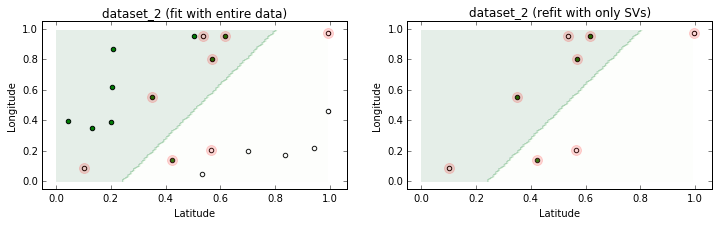

In [44]:
# Load dataset_1
x = data_2.values[:, :-1]
y = data_2.values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_2 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_2 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

It appears that in both cases, the decision boundary of an SVM is completely determined by a subset of data points - the support vectors. In Dataset 1, it's possible to find a subset of points from the two classes that are well separated, SVM chooses the subset in which the classes are maximally separated (the margin between points from different classes is maximized). In Dataset 2 it is not possible. Any decision boundary will have some errors (a mix of classes on either side). In this case, how do we choose the best support vectors or best margin?

### Step 2: Play with values of the parameters of the model

In defining our support vector classifier, we needed to specify the parameter `C` and `kernel`. What doest the parameter `C` control?

In [35]:
#--------  fit_and_plot_svm_for_c
# Fit and plot SVM model for value of 'C', overlayed on a scatter plot of data 
# (fit on train set and evaluate on test set)
#
# Input: 
#      x_train (array of train predictors)
#      y_train (array of train responses)#      
#      x_test (array of test predictors)
#      y_test (array of test responses)
#      bounds (tuple of bounds for plotting)
#      C  (value for parameter C)
#      ax (axes to plot on)

def fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='linear')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

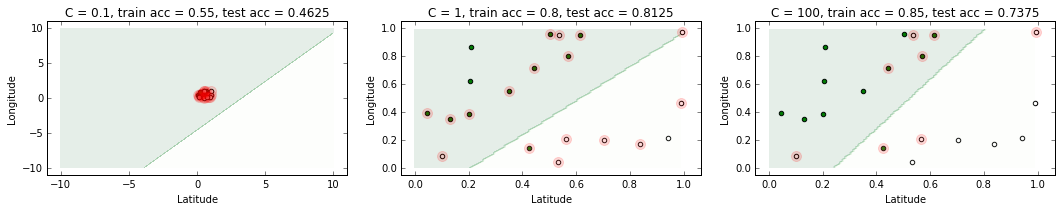

In [36]:
# Load train data
data_train = np.loadtxt("datasets/dataset_2_train.txt", delimiter=',')
x_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

# Load test data
data_test = np.loadtxt("datasets/dataset_2_test.txt", delimiter=',')
x_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

# Fit and plot for different 'C' values
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

ax[0] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 0.1, ax[0], (-10, 10))

ax[1] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 1, ax[1])

ax[2] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 100, ax[2])

plt.tight_layout()

For `dataset_2`, any linear decision boundary would have some errors. In this case, SVM chooses a decision boundary by trading-off the errors for margin (i.e. balancing minimizing error with maximizing margin). It appears that the parameter $C$ controls the trade-off. 

Increasing $C$ lays more emphasis on accuracy and less emphasis on the margin of separation. As a result, the model tends to overfit the train set, and perform poorly on the test set.

For $C=0.01$, the model clearly underfits the train set. For $C=100$, the model overfits the train set. For $C=1$, the fitted model misclassifies a point in the upper left corner (which could have othwerwise been classified correctly by a linear model), and achieves higher margin.


### Step 3: Push your analysis further

**Lingering Questions:**

1. How does SVM compare with the other classifiers we know?
2. It looks like the only decision boundaries SVM draws, so far, are lines. This is pretty limiting. Is there any way for us to change the shape of the decision boundary (how did we get logistic regression to draw curvy boundaries)? **Hint:** experiment with the `kernel` parameter in `sklearn`'s SVM model. What does the `kernel` parameter control? What is it doing to your data (draw an analogy to logistic regression with non-linear boundaries)?
3. Which model is better for remote senseing? In this lab, we've only explored SVM. How does SVM compare with other classifiers in terms of addressing the challenges of remote sensing for land cover analysis?